# Cureya Week 3 Tasks: Housing Price Prediction




**Dataset File: HousingData.csv**

**Executed By Sudhanshu Kumar** |sudhanshukumar15678@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 


#imports for KNN

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df1 = pd.read_csv("HousingData.csv")

In [3]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Data Preprocessing

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df1.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df2=df1.dropna()
df2.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#**Plotting Some graphs for better understanding of dataset**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

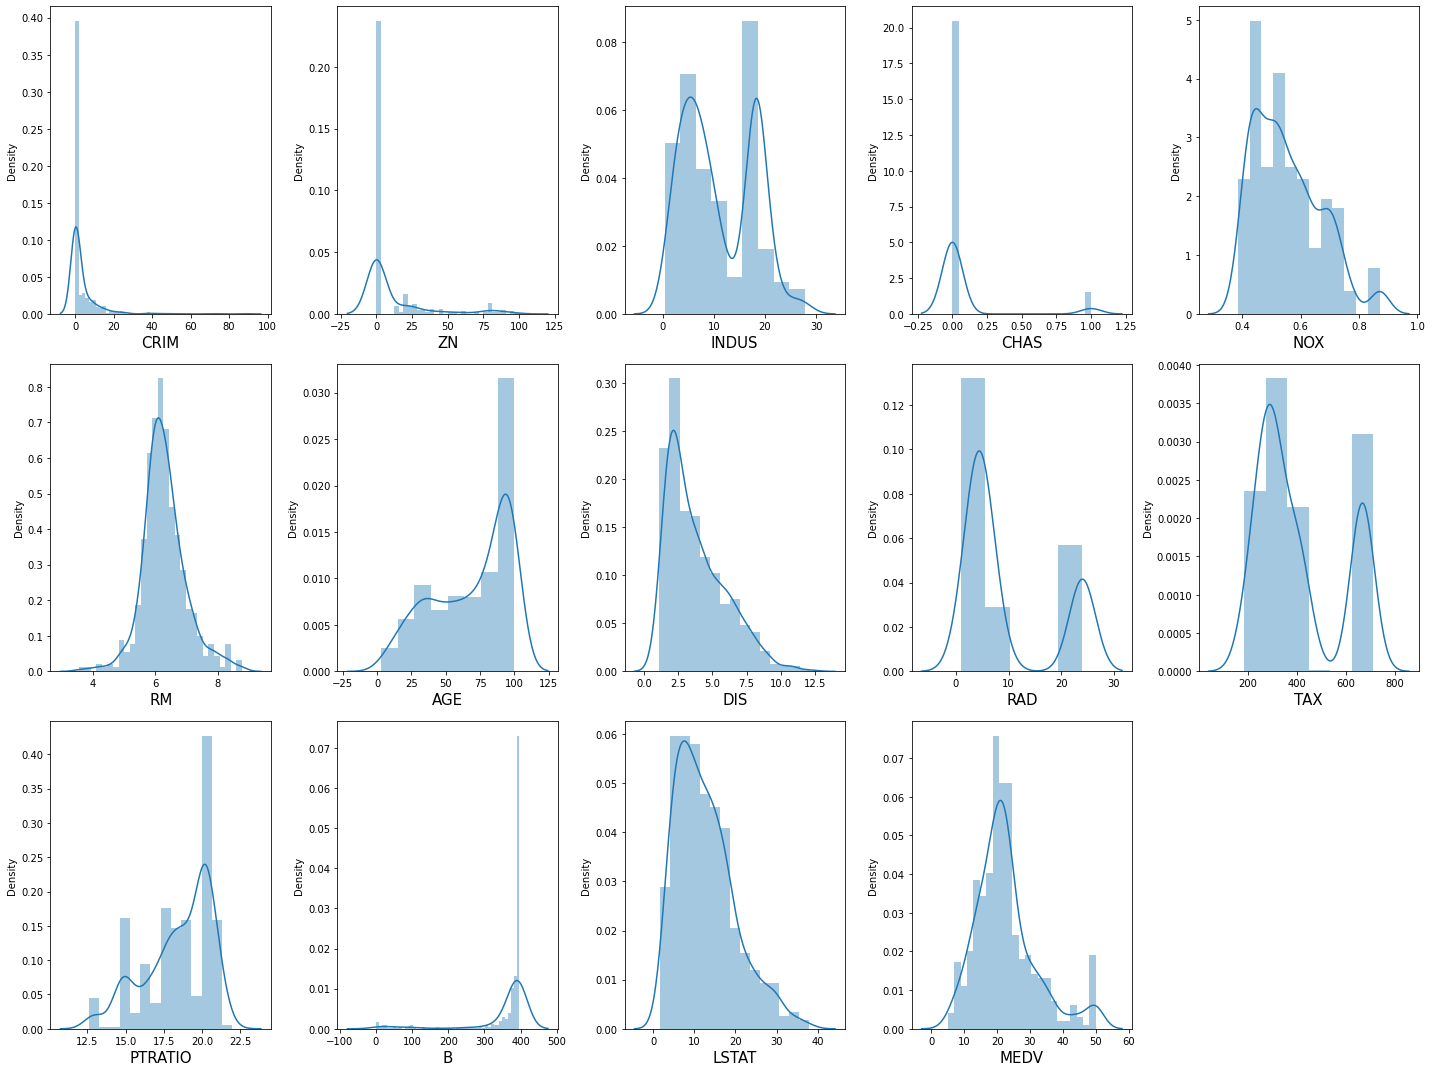

In [8]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df1:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

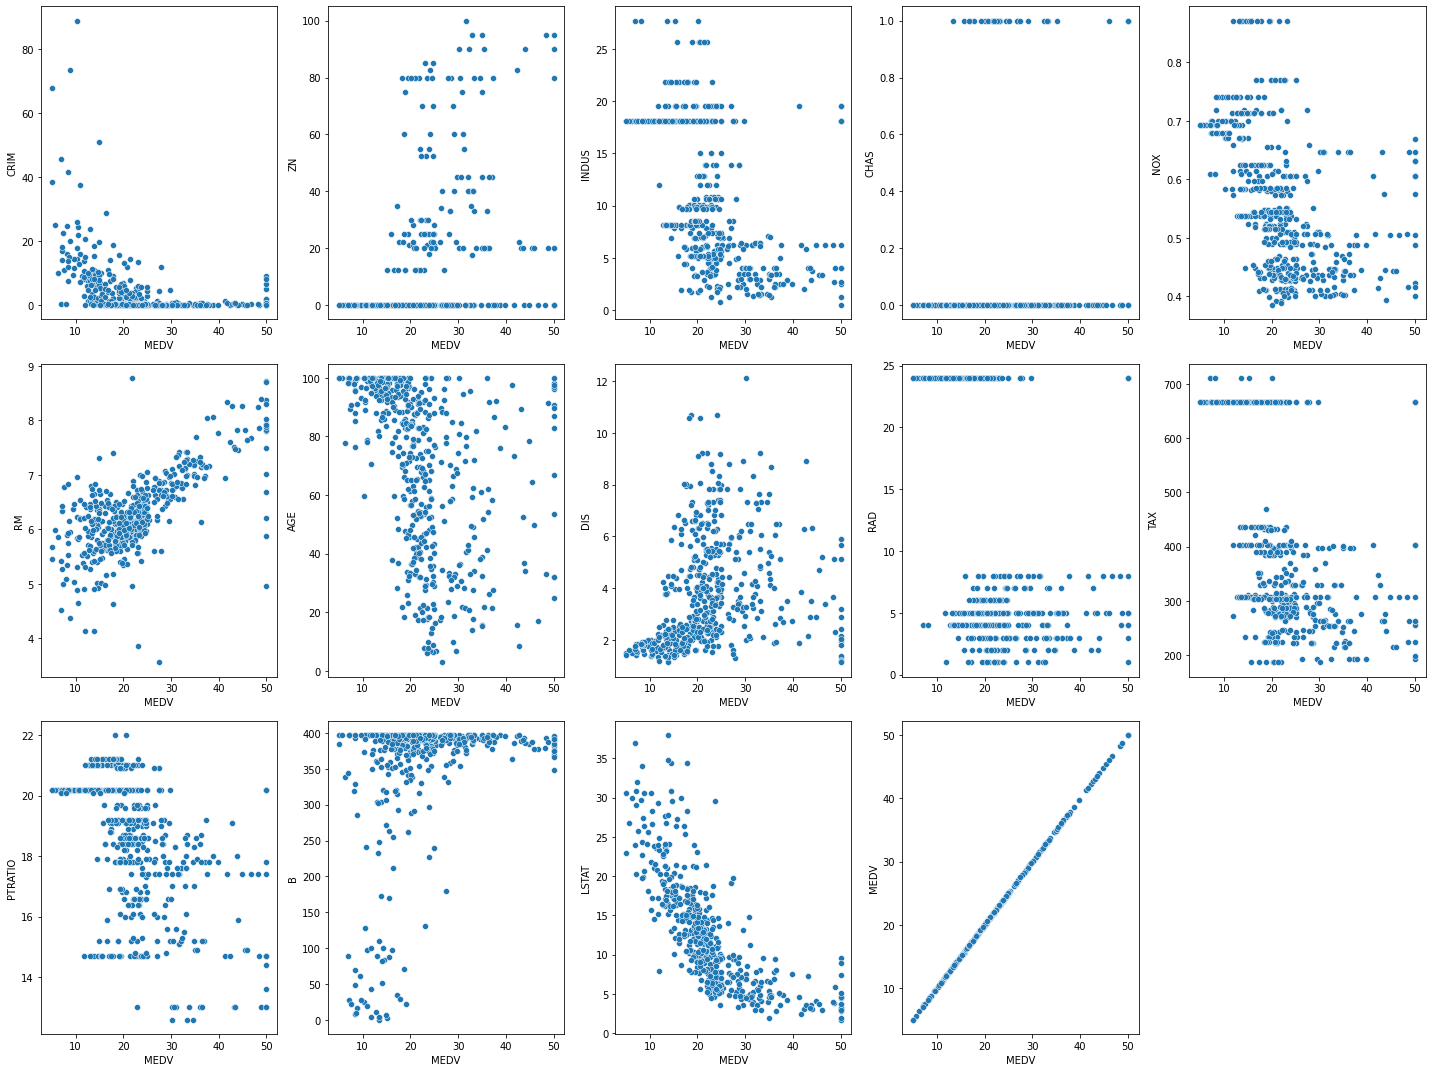

In [9]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df1:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df1['MEDV'], y = df1[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

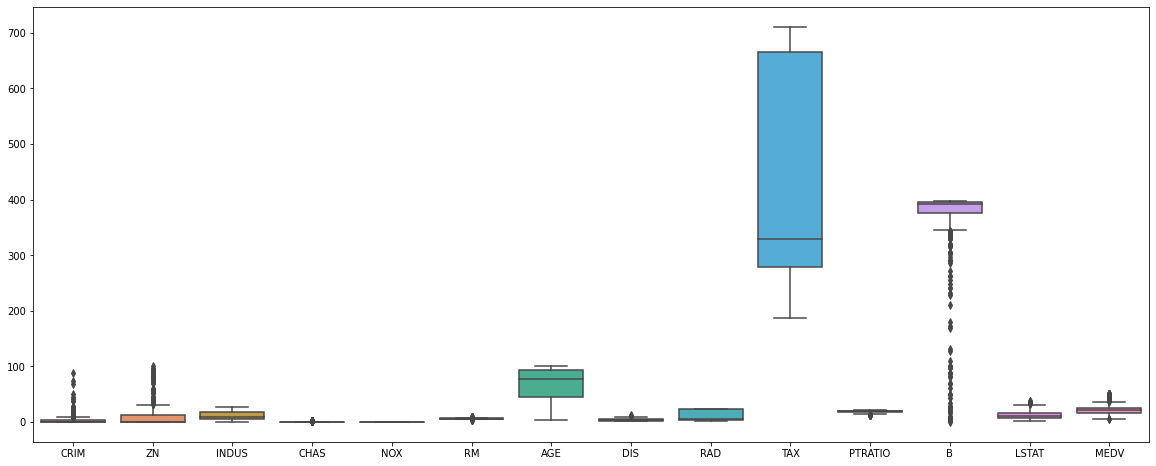

In [10]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df1, width = 0.8)
plt.show()

#Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


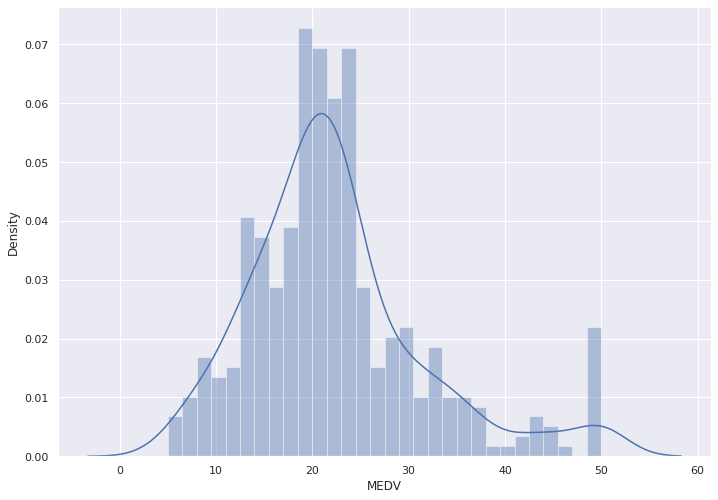

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df2['MEDV'], bins=30)
plt.show()

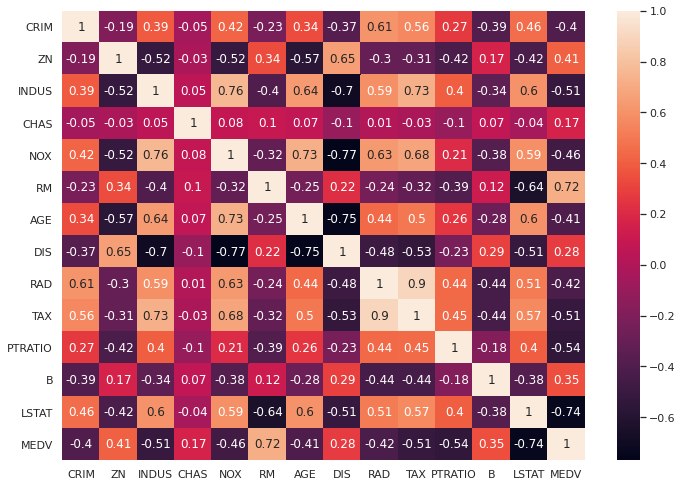

In [12]:
correlation_matrix = df2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)#annot=True to print values in the square

#OBSERVATION

1) Variables that have a high correlation with MEDV are RM and LTSAT

2) RM has a positive correlation - '0.72'

3) MEDV has a negative correlation - '-0.74'

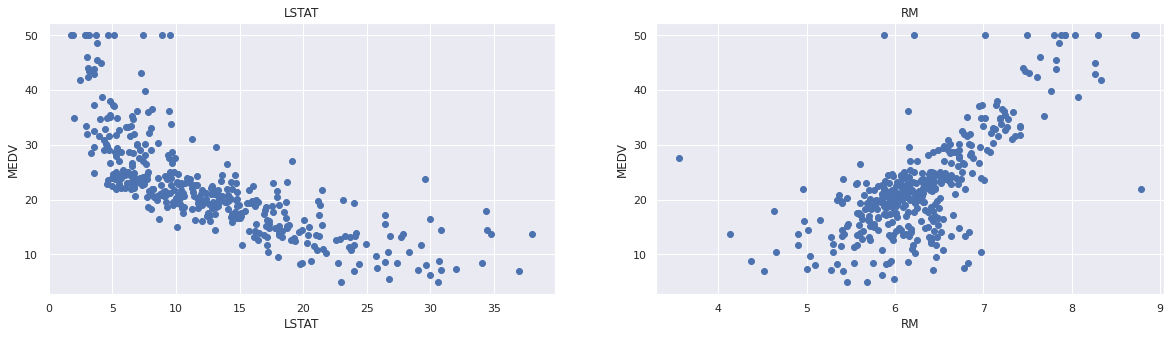

In [13]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df2['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df2[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#OBSERVATION

1) The price decreases as LTSAT increases. The relation does not seem to be linear

2) The price increases as RM increases linearly

In [14]:
X = pd.DataFrame(np.c_[df2['LSTAT'], df2['RM']], columns = ['LSTAT','RM'])
Y = df2['MEDV']

#Split the data into training and testing datasets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(315, 2)
(79, 2)
(315,)
(79,)


#Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.42734043396161
R2 score is 0.6479023967476796


The model performance for testing set
--------------------------------------
RMSE is 4.981788036611337
R2 score is 0.6900038035365309


**Predicted prices using Linear Regression**

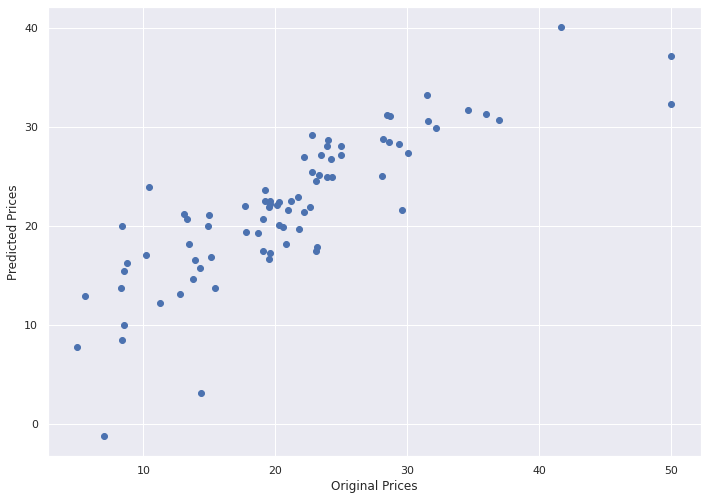

In [18]:
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Original Prices')
plt.ylabel('Predicted Prices')
plt.show()

#K Nearest Neighbours

In [19]:
boston = load_boston()
print("Boston data-shape: {0}".format(boston.data.shape))

Boston data-shape: (506, 13)


In [20]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [21]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [22]:
bos = pd.DataFrame(boston['data'])
bos.columns = boston['feature_names']
bos['Price'] = boston['target']
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
def get_r_squared(max_neighbors=10):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

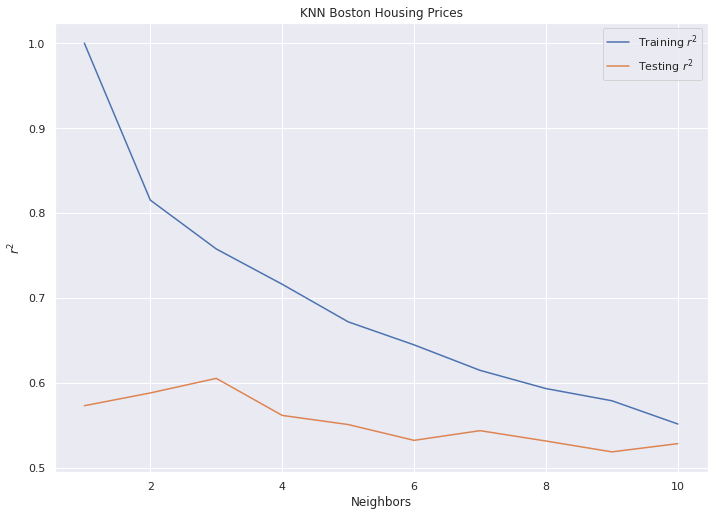

In [24]:
train_score, test_score, models = get_r_squared()
neighbors = range(1, 11)
plt.plot(neighbors, train_score, label="Training $r^2$")
plt.plot(neighbors, test_score, label="Testing $r^2$")
plt.xlabel("Neighbors")
plt.ylabel("$r^2$")
plt.title("KNN Boston Housing Prices")
plt.legend()

In [25]:
print("Training r2 for 2 neigbors: {:.2f}".format(train_score[1]))
print("Testing r2 for 2 neighbors: {:.2f}".format(test_score[1]))
#assert max(test_score) == test_score[1]

Training r2 for 2 neigbors: 0.82
Testing r2 for 2 neighbors: 0.59


In [26]:
KNR = KNeighborsRegressor(20)
KNR.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [27]:
test = np.array(boston['data'][504])
test1 = test.reshape(1,-1)
bos.loc[500:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


**Predicted price through KNN algorithm**

In [28]:
KNR.predict(test1)

array([27.27])